In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/marco/Desktop/johnny_deep/johnny_deep/utils.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, Y = make_moons(n_samples=1000, noise=0.05, random_state=100)
X = X.transpose()

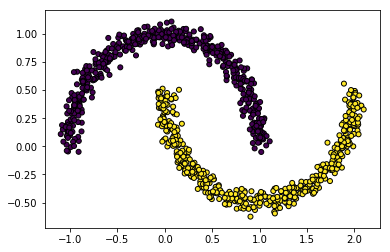

In [5]:
plt.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

In [6]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 20, "type": "sigmoid"},
    {"dimension": 50, "type": "sigmoid"},
    {"dimension": 50, "type": "sigmoid"},
    {"dimension": 25, "type": "sigmoid"},
    {"dimension": 1, "type": "sigmoid"},
]

In [7]:
m = johnny_deep.models.Model(nn_architecture)

In [8]:
m.model_info()

Layer 1: sigmoid with dimension 20
W shape: (20, 2)
b shape: (20, 1)
Layer 2: sigmoid with dimension 50
W shape: (50, 20)
b shape: (50, 1)
Layer 3: sigmoid with dimension 50
W shape: (50, 50)
b shape: (50, 1)
Layer 4: sigmoid with dimension 25
W shape: (25, 50)
b shape: (25, 1)
Layer 5: sigmoid with dimension 1
W shape: (1, 25)
b shape: (1, 1)


In [9]:
for ix in range(10000):
    Y_hat = m.forward(X)
    m.back_propagation(Y)
    m.optimization_step(0.5)
    
    epoch_no = ix+1
    cost = johnny_deep.utils.get_cost_value(Y_hat, Y)
    if epoch_no % 100 == 0:
        print("Epoch {} - cost {}".format(epoch_no, cost))

Epoch 100 - cost 0.6931409994590094
Epoch 200 - cost 0.6931370933123082
Epoch 300 - cost 0.693133121444989
Epoch 400 - cost 0.6931290452014808
Epoch 500 - cost 0.6931248236035044
Epoch 600 - cost 0.6931204123571896
Epoch 700 - cost 0.6931157627123108
Epoch 800 - cost 0.6931108201158723
Epoch 900 - cost 0.6931055225864905
Epoch 1000 - cost 0.6930997987134883
Epoch 1100 - cost 0.6930935651525552
Epoch 1200 - cost 0.693086723444024
Epoch 1300 - cost 0.6930791559138371
Epoch 1400 - cost 0.6930707203211464
Epoch 1500 - cost 0.6930612427745193
Epoch 1600 - cost 0.6930505082257823
Epoch 1700 - cost 0.6930382475255885
Epoch 1800 - cost 0.6930241195193516
Epoch 1900 - cost 0.6930076858591981
Epoch 2000 - cost 0.6929883749017078
Epoch 2100 - cost 0.6929654288815698
Epoch 2200 - cost 0.6929378248061259
Epoch 2300 - cost 0.6929041528674753
Epoch 2400 - cost 0.6928624239230574
Epoch 2500 - cost 0.6928097540688707
Epoch 2600 - cost 0.6927418268774229
Epoch 2700 - cost 0.6926519325748823
Epoch 2800 -

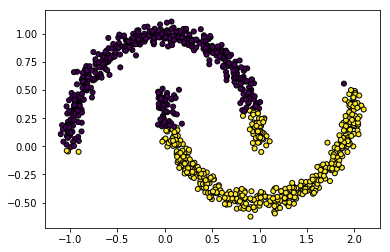

In [10]:
Y_hat = m.forward(X)
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, s=25, edgecolor='k')